# MBTI Story Telling
Looking at some interesting trends in the dataset might reveal practical insights before the text undergoes feature extraction for classifier training. 

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

In [5]:
#read in mbti_cleaned.csv and drop 'Unnamed: 0' column
df = pd.read_csv('mbti_cleaned_unsplit1.csv', encoding = "ISO-8859-1")
df = df.drop('Unnamed: 0', axis=1)
df.head()

,type,posts,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moments sportscenter top ten plays p...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack posts alarming sex boring posi...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing curse absolu...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired another silly misconception approa...


Investigate any abnmormalities in the data by calling `.info()`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
type           8675 non-null object
posts          8675 non-null object
clean_posts    8674 non-null object
dtypes: object(3)
memory usage: 203.4+ KB


Looks like some null values escaped the data cleaning. They must be removed.

In [7]:
#select only entries with no null values
df = df[pd.notnull(df['clean_posts'])]
df = df[pd.notnull(df['posts'])]

How is each personality type represented within the data set? 

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


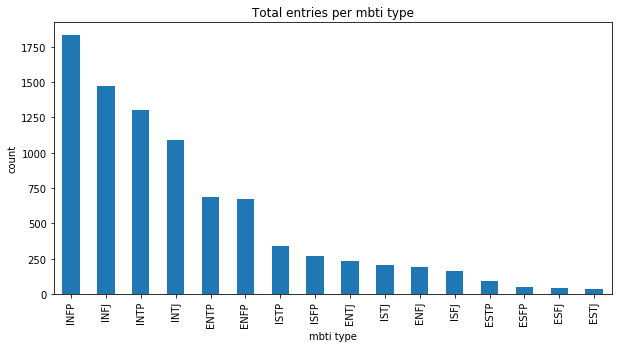

In [8]:
#set figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

#plot count of each entry by mbti category
df.type.value_counts().plot.bar(x='type')
plt.title("Total entries per mbti type")
plt.xlabel('mbti type')
plt.ylabel('count')
plt.show()

There is a bias in how much the personality types are represented in the data. What could be the cause of this? We will investigate shortly.

## 1. Mean Word Count
Are distinct differences in the mean word count of each entry per personality type? 

In [9]:
#using lambda functions, create new columns with counts of cleand and uncleaned entries 
df['words_per_comment_unclean'] = df['posts'].apply(lambda x: len(x.split()))
df['words_per_comment_clean'] = df['clean_posts'].apply(lambda x: len(x.split()))

Populating the interactive namespace from numpy and matplotlib


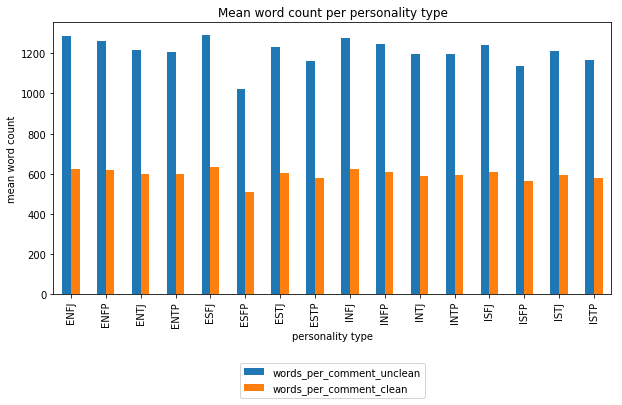

In [10]:
#set figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

#graph mean word count per personality type
df.groupby(['type']).mean().plot(kind='bar', legend=True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.title('Mean word count per personality type')
plt.xlabel('personality type')
plt.ylabel('mean word count')
plt.show()

While there is a difference between each category, it seems to be quite marginal. With 16 categories it is hard to tell. Conisdering how the MBTI tests are classified, it may be prudent to investigate the data from a different point of view to get a better picture of whats going on.

## 2. Investigating by Axis
Each of the four letters in each category classification is part of a bipolar axis. For instance the first letter of each classification is either E (extroversion) or I(introversion). This represents the first axis, where a person is rated along the axis between E and I. They recieve the first letter of their personalit classification based on whether they fell closer to E or I. There are 4 such axis, the second being N (intuition) to S (sensing), the third being T (thinking) to F (feeling) and the fourth being J (judging) to P (perceieving). Their final classification is a sequence of 4 letters, one selected from each axis. Based on this breakdown of how the personality is scored, I think we should investigate by axis to cut down on the categories to compare (from 16 categories to 4 axis with two ends each). However, by doing this we must understand that we can only compare two ends of the same axis at one time, and not compare results between axis.

In [11]:
#define the side of each axis by selecting entries with the corresponding letter in the correct position
extrovert = df.loc[df['type'].str[0] == 'E']
introvert = df.loc[df['type'].str[0] == 'I']
intuition = df.loc[df['type'].str[1] == 'N']
sensing = df.loc[df['type'].str[1] == 'S']
thinking = df.loc[df['type'].str[2] == 'T']
feeling = df.loc[df['type'].str[2] == 'F']
judging = df.loc[df['type'].str[3] == 'J']
percieving = df.loc[df['type'].str[3] == 'P']

In [12]:
#list of tuples for reference (name, dataframe)
axes = (('extrovert', extrovert), ('introvert', introvert), ('intuition', intuition), ('sensing', sensing),
        ('thinking', thinking), 
        ('feeling',feeling), ('judging',judging), ('percieving', percieving))

#print the entry count and mean word count of each dataframe
for x, y in axes:
    print(x + ' total entries: ' + str(y.shape[0]))
    print(x + ' posts mean word count ' + str(y['words_per_comment_clean'].mean()))


extrovert total entries: 1999
extrovert posts mean word count 605.2991495747874
introvert total entries: 6675
introvert posts mean word count 602.3056179775281
intuition total entries: 7477
intuition posts mean word count 606.4800053497391
sensing total entries: 1197
sensing posts mean word count 581.2297410192147
thinking total entries: 3981
thinking posts mean word count 592.0645566440593
feeling total entries: 4693
feeling posts mean word count 612.2680588109951
judging total entries: 3434
judging posts mean word count 608.156086196855
percieving total entries: 5240
percieving posts mean word count 599.6135496183206


Inerestingly enough, there isn't too much difference within each axis in mean word count. The greatest difference is between intuition and sensing, with a range of 25, but sensing had the lowest entry count out of all the axis categories. The most notable difference in mean word count was between thinking and feeling (592 and 612 respectively), where their entry counts were only different by about 700. This leads me to believe that mean word count is more than likely uniform across each of the 4 continuous axis and not distinct from either end in any of the categories (after accounting for category representation bias in the data).
### Extroversion VS Introversion
I initally assumed there would be more extroverts posting comments online, as I figured that an extroverted personality would be more comfortable with sharing with thoughts with strangers. My asssumption was wrong, as there are nearly 3.5x the entries for introverts than for extroverts. Consider this passage from Wikipedia:
>People who prefer extraversion draw energy from action: they tend to act, then reflect, then act further. If they are inactive, their motivation tends to decline. To rebuild their energy, extraverts need breaks from time spent in reflection. Conversely, those who prefer introversion "expend" energy through action: they prefer to reflect, then act, then reflect again. To rebuild their energy, introverts need quiet time alone, away from activity

If the internet a place for *reflection* and not action, then that would explain why introverts are more active online according to this dataset. Looking at the word cloud, there is some obvious overlap in word choice, but just as many differences. Something worth noting is that introverts will reference introverts when commenting, as opposed to extroverts who not only reference themselves but also introverts.

extrovert total entries: 1999
extrovert posts mean word count 605.2991495747874
introvert total entries: 6675
introvert posts mean word count 602.3056179775281


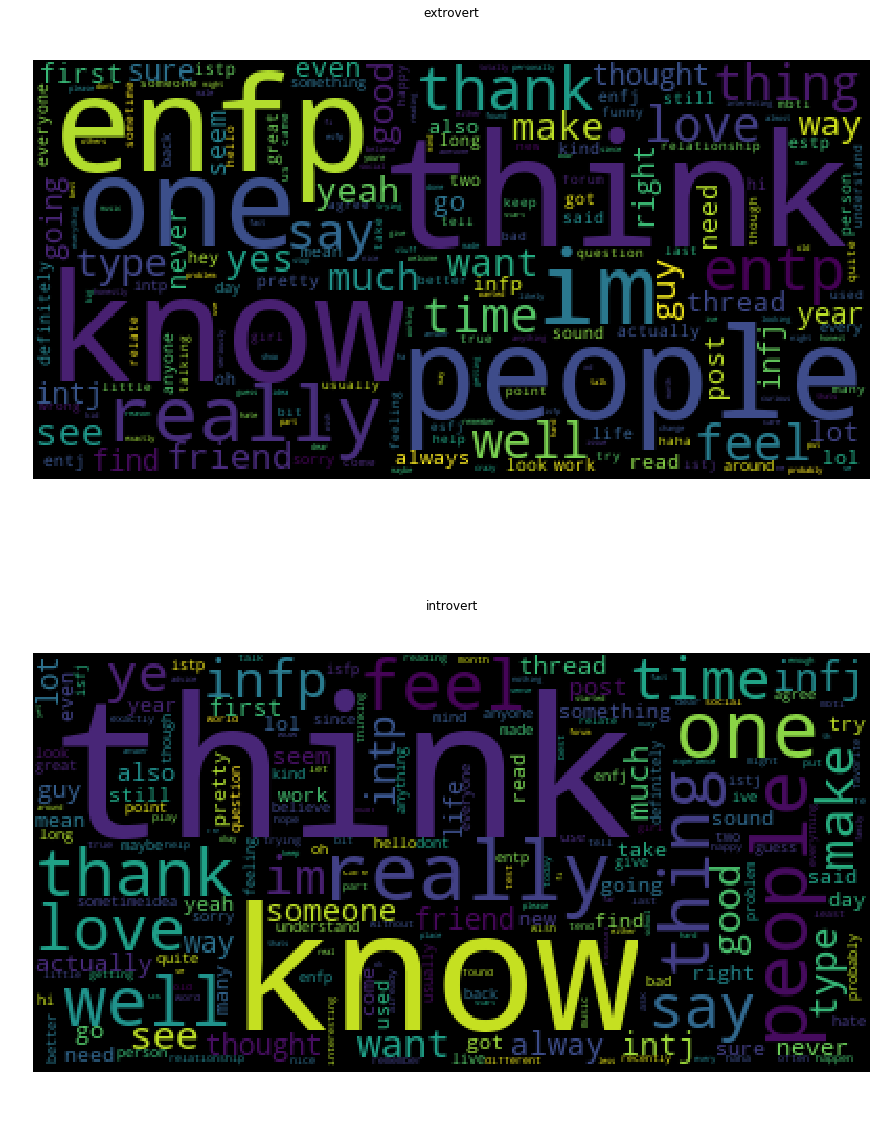

In [13]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,20))
k = 0
for x, y in axes[:2]:
    print(x + ' total entries: ' + str(y.shape[0]))
    print(x + ' posts mean word count ' + str(y['words_per_comment_clean'].mean()))
    wordcloud = WordCloud().generate(y['clean_posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(x)
    ax[k].axis("off")
    k += 1

### Intuition Vs Sensing
This axis had the starkest difference in difference in representation in the dataset (7477 intuition versus 1197 sensing, a whopping 6.25x more intuition entries than sensing). Their difference in mean word count could definitely have been affected by this representation bias. To understand the implications of this representation bias, consider this passage from Wikipedia concerning the I vs S axis:
>People who prefer sensing are more likely to trust information that is in the present, tangible, and concrete: that is, information that can be understood by the five senses... They prefer to look for details and facts. For them, the meaning is in the data. On the other hand, those who prefer intuition tend to trust information that is less dependent upon the senses, that can be associated with other information (either remembered or discovered by seeking a wider context or pattern). 

Without philosophizing to much about the implications of the internet's affect on people's means of perceiving the world around them, I would consider this passage to be a decent explaination of the representation bias within this data set. The way that one interacts with and through the internet is fairly limited in sensory terms; we can read information, watch videos, and listen to audio. There is little to no physical aspect of the internet with which to interact. It makes sense to think then, that the internet would attract people who trust information as it exists in context with other information (from a technology primarily concerned with the disbursement of information). In other words, the internet is a provincial paradise for people on the intuition side of this axis, and a sensory void for those on the sensing end of the spectrum. 



intuition total entries: 7477
intuition posts mean word count 606.4800053497391
sensing total entries: 1197
sensing posts mean word count 581.2297410192147


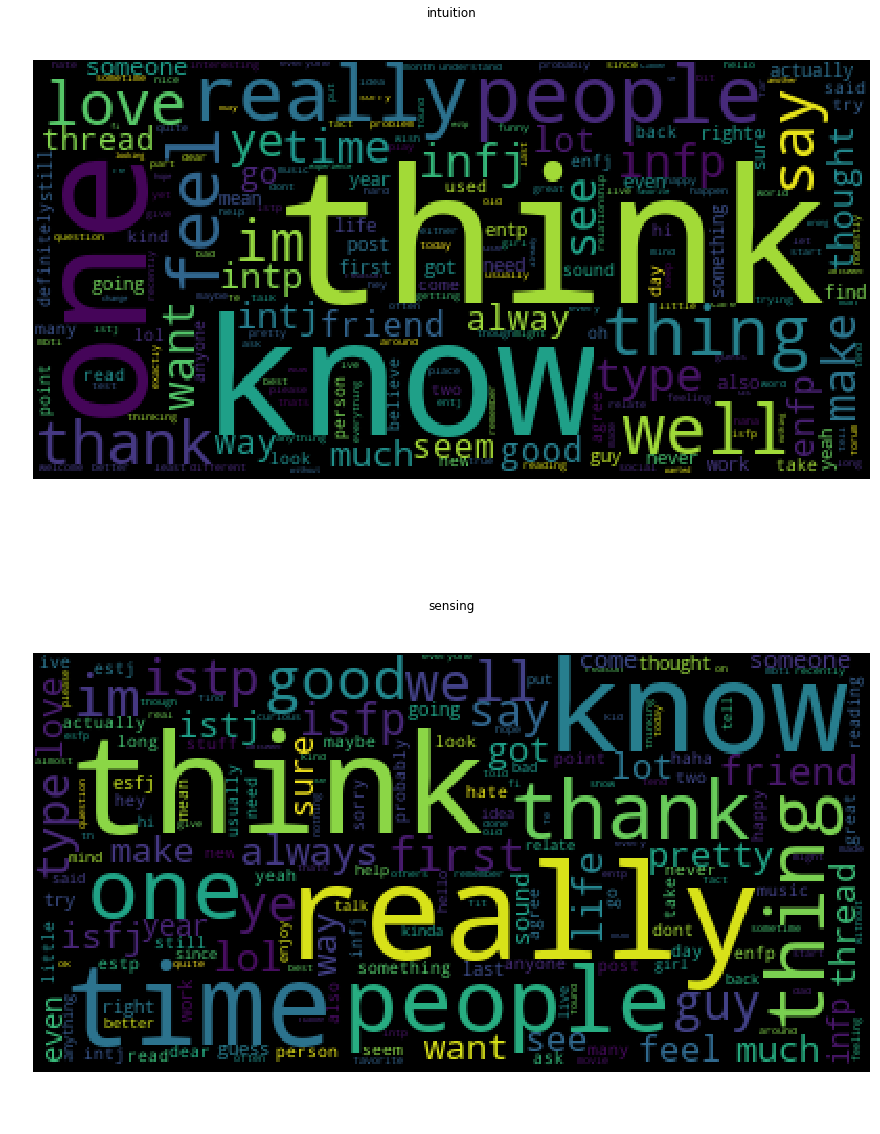

In [14]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,20))
k = 0
for x, y in axes[2:4]:
    print(x + ' total entries: ' + str(y.shape[0]))
    print(x + ' posts mean word count ' + str(y['words_per_comment_clean'].mean()))
    wordcloud = WordCloud().generate(y['clean_posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(x)
    ax[k].axis("off")
    k += 1

### Thinking Vs Feeling
Here we see a more or less equal representation on both ends of the this particular axis. Perhaps there is no difference in the two that would govern different behavior online? Again, let's refer to what we already know from Wikipedia:
>Those who prefer thinking tend to decide things from a more detached standpoint, measuring the decision by what seems reasonable, logical, causal, consistent, and matching a given set of rules. Those who prefer feeling tend to come to decisions by associating or empathizing with the situation, looking at it 'from the inside' and weighing the situation to achieve, on balance, the greatest harmony, consensus and fit, considering the needs of the people involved. 

So then it seams there isn't a difference between the two ends that would merit a contrast in their behavior online. However, this axis exhibits the biggest difference mean entry length (at least the difference that might not be due to bias in the data, which of course is an assumption on my behalf). Would it be too much of a stretch to say that those on the thinking end of the axis, being more governed by logic and order, would post shorter comments? Within the boundaries of what we can see, that is already pushing the limits of we can assume.

thinking total entries: 3981
thinking posts mean word count 592.0645566440593
feeling total entries: 4693
feeling posts mean word count 612.2680588109951


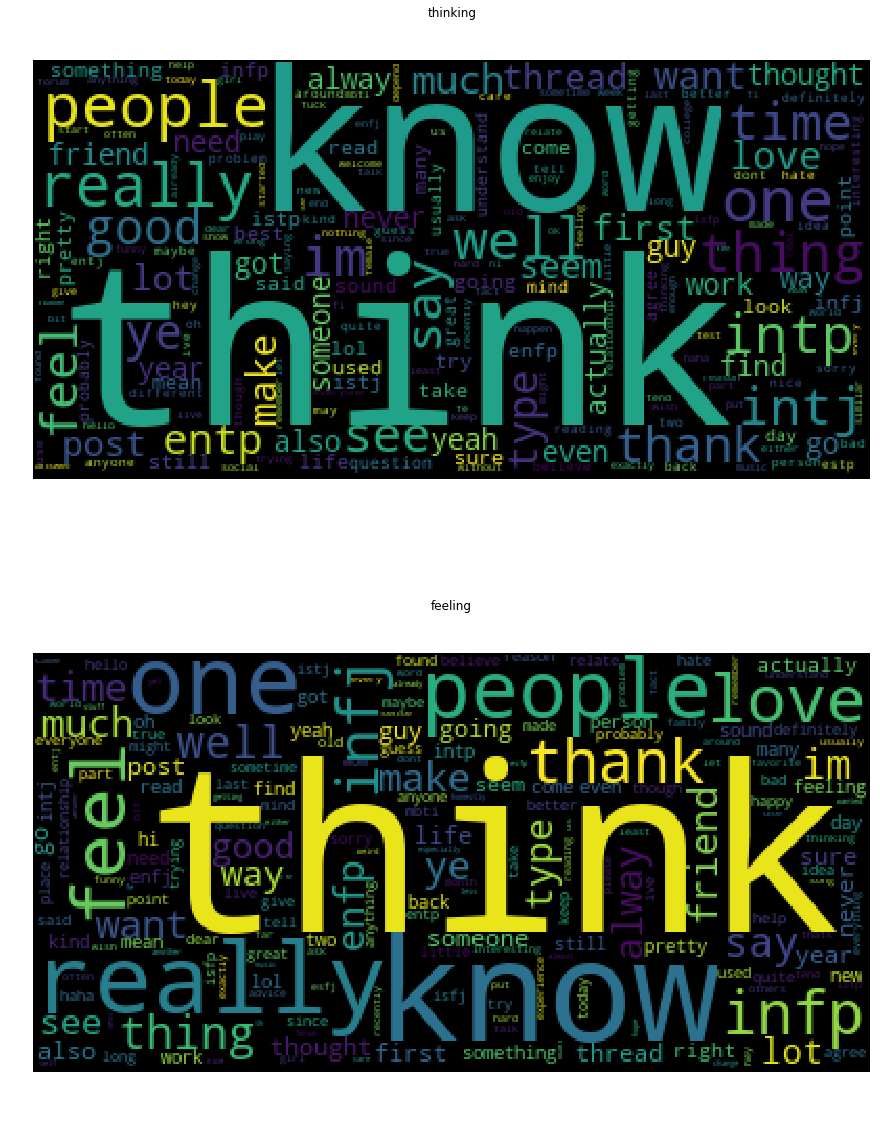

In [15]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,20))
k = 0
for x, y in axes[4:6]:
    print(x + ' total entries: ' + str(y.shape[0]))
    print(x + ' posts mean word count ' + str(y['words_per_comment_clean'].mean()))
    wordcloud = WordCloud().generate(y['clean_posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(x)
    ax[k].axis("off")
    k += 1

### Judging Vs Percieving
Not a whole lot going on here, besides a disproportioned representation between judging and percieving. Is there an explanation for this (seemingly minor) distinction?
>According to Myers, judging types like to "have matters settled"...  perceptive types prefer to "keep decisions open".

Perhaps then we might say that perceptive types are more likely to be open to and respond to discussions on the internet, as opposed to Judging types who might have already have their minds made up and thus find interaction on the web to be less appealing. 

judging total entries: 3434
judging posts mean word count 608.156086196855
percieving total entries: 5240
percieving posts mean word count 599.6135496183206


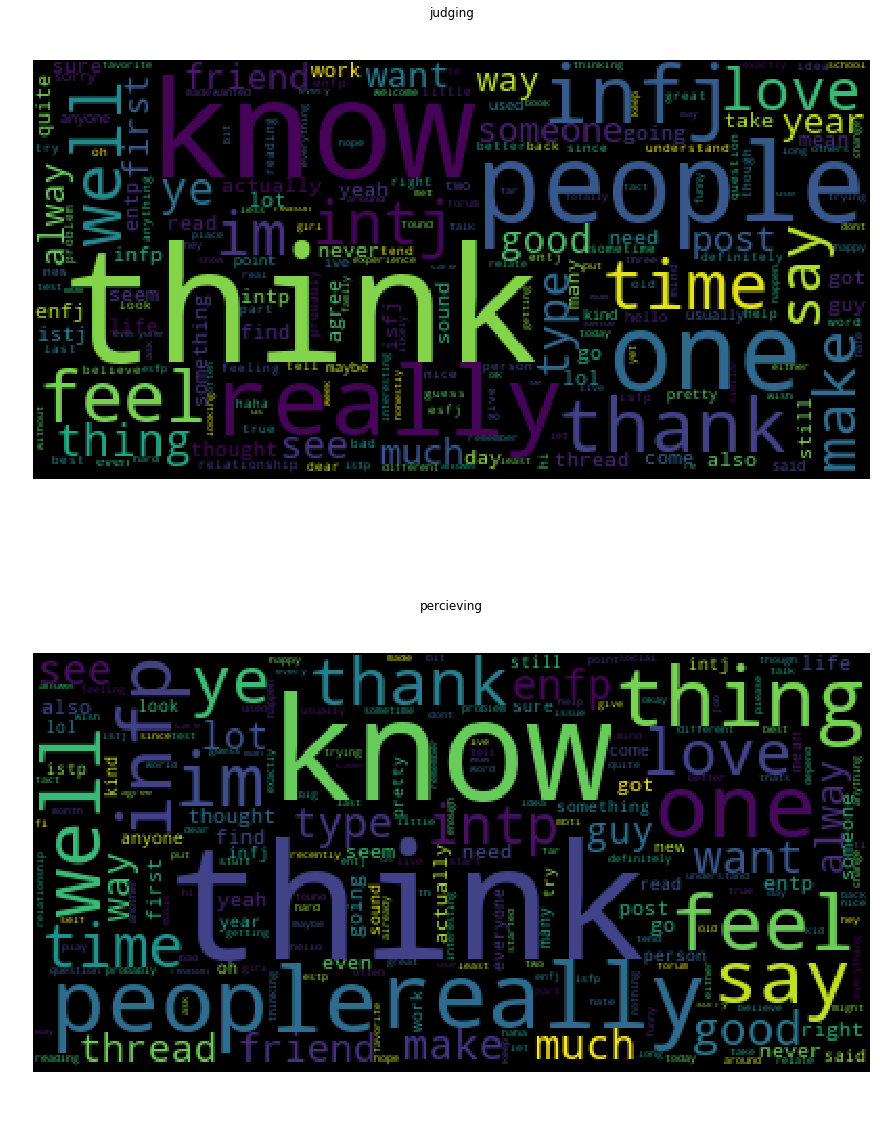

In [16]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,20))
k = 0
for x, y in axes[6:8]:
    print(x + ' total entries: ' + str(y.shape[0]))
    print(x + ' posts mean word count ' + str(y['words_per_comment_clean'].mean()))
    wordcloud = WordCloud().generate(y['clean_posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(x)
    ax[k].axis("off")
    k += 1

## 3. Conclusion
After initially checking the data, it seemed more prudent to investigate categories based on their classification axis (8 extremes of 4 axis) instead of comparing 16 different categories. After doing so there were more apparent differences, althought it was difficult to infer too much. Using what information was available about each axis, it was possible with reasonable doubt to assume that the distribution of personality type representation in the data was quite reasonably due to certain behavior habits that could be attributed to those particular personality types. 